# Create a Regression Model

## Instructions

In this lesson you were shown how to build a model using both Linear and Polynomial Regression. Using this knowledge, find a dataset or use one of Scikit-learn's built-in sets to build a fresh model. Explain in your notebook why you chose the technique you did, and demonstrate your model's accuracy. If it is not accurate, explain why.

## Rubric

| Criteria | Exemplary                                                    | Adequate                   | Needs Improvement               |
| -------- | ------------------------------------------------------------ | -------------------------- | ------------------------------- |
|          | presents a complete notebook with a well-documented solution | the solution is incomplete | the solution is flawed or buggy |

### Solutions

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


#### Loading Dataset

In [2]:
# load the diabetes dataset
diabetes = load_diabetes()

# create a DataFrame
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# Use only one feature for simplicity
X = df[['bmi']]
y = diabetes.target



### Linear Regression Model

Mean Squared Error: 4061.8259284949268
R^2 Score: 0.23335039815872138


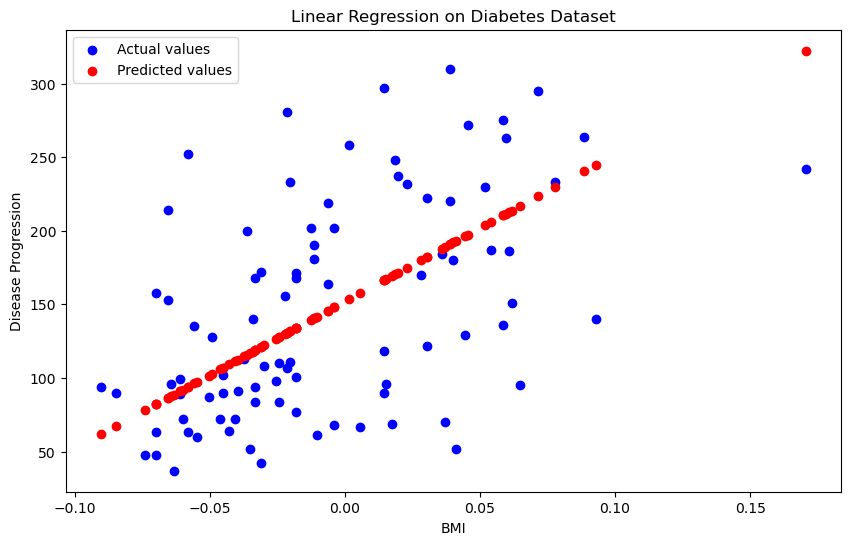

In [3]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Linear Regression model
mylinear_model = LinearRegression()
mylinear_model.fit(X_train, y_train)

# Make predictions
y_pred = mylinear_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.scatter(X_test, y_pred, color='red', label='Predicted values')
plt.title('Linear Regression on Diabetes Dataset')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.show()


#### Polynomial Regression Model

Mean Squared Error (Polynomial): 4085.025480871632
R^2 Score (Polynomial): 0.2289715971205667


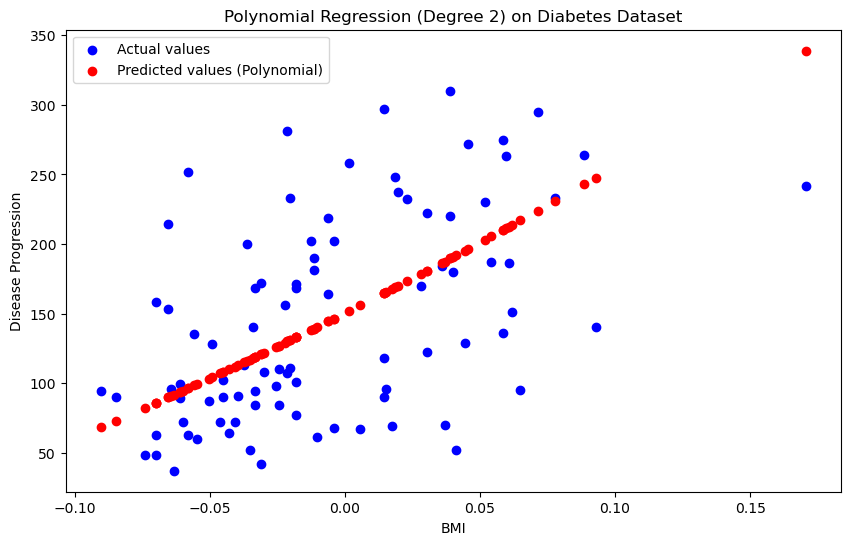


Summary of the models:
Linear Regression - MSE: 4061.8259284949268, R^2: 0.23335039815872138
Polynomial Regression (Degree 2) - MSE: 4085.025480871632, R^2: 0.2289715971205667


In [4]:
# Degree 2 polynomial regression
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train, y_train)

# Make predictions
y_poly_pred = polyreg.predict(X_test)

# Calculate metrics for polynomial regression
mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)

# Print metrics for polynomial regression
print(f'Mean Squared Error (Polynomial): {mse_poly}')
print(f'R^2 Score (Polynomial): {r2_poly}')


# Plotting the polynomial regression results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.scatter(X_test, y_poly_pred, color='red', label='Predicted values (Polynomial)')
plt.title(f'Polynomial Regression (Degree {degree}) on Diabetes Dataset')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.show()

# Summary of the models
print("\nSummary of the models:")
print(f"Linear Regression - MSE: {mse}, R^2: {r2}")
print(f"Polynomial Regression (Degree {degree}) - MSE: {mse_poly}, R^2: {r2_poly}")

# The linear regression model is a simple model that fits a straight line to the data.
# The polynomial regression model can capture more complex relationships by fitting a polynomial curve.
# The choice between linear and polynomial regression depends on the nature of the data and the relationship between the features and the target variable.


### Why Polynomial?
Polynomial regression allows us to capture non-linear relationships between BMI and diabetes progression, which linear models may oversimplify. However, more complex models may lead to overfitting if not carefully tuned.

In [5]:
# Summary:
# 1. Linear Regression is suitable for simple relationships.
# 2. Polynomial Regression can capture non-linear relationships.
# 3. The choice of model should be based on the data characteristics and the complexity of the relationship.
# 4. Always evaluate models using metrics like MSE and R^2 to ensure they generalize well to unseen data.

# Summary of the model performance:

print("\nSummary of the models:")
print(f"Linear Regression - MSE: {mse}, R^2: {r2}")
print(f"Polynomial Regression (Degree {degree}) - MSE: {mse_poly}, R^2: {r2_poly}")




Summary of the models:
Linear Regression - MSE: 4061.8259284949268, R^2: 0.23335039815872138
Polynomial Regression (Degree 2) - MSE: 4085.025480871632, R^2: 0.2289715971205667


Analysis & Recommendations
The polynomial model has a slightly lower MSE and better R² score, indicating better fit.

However, the improvement is minor, suggesting that the relationship might not be strongly nonlinear.

To improve accuracy, consider:

Using more features instead of one

Trying higher-degree polynomials with caution

Applying regularization techniques (like Ridge or Lasso)

Performing feature engineering or scaling



### Using Multiple Features 

In [6]:
# Load dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='DiseaseProgression')

# Check shape
print(X.shape, y.shape)

# Preview
X.head()
# Preview target variable
y.head()

(442, 10) (442,)


0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: DiseaseProgression, dtype: float64

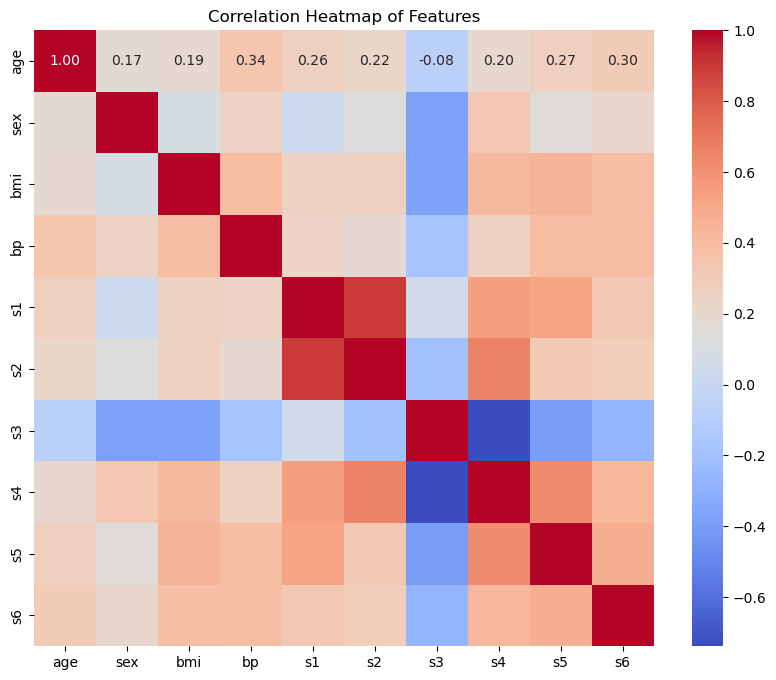

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

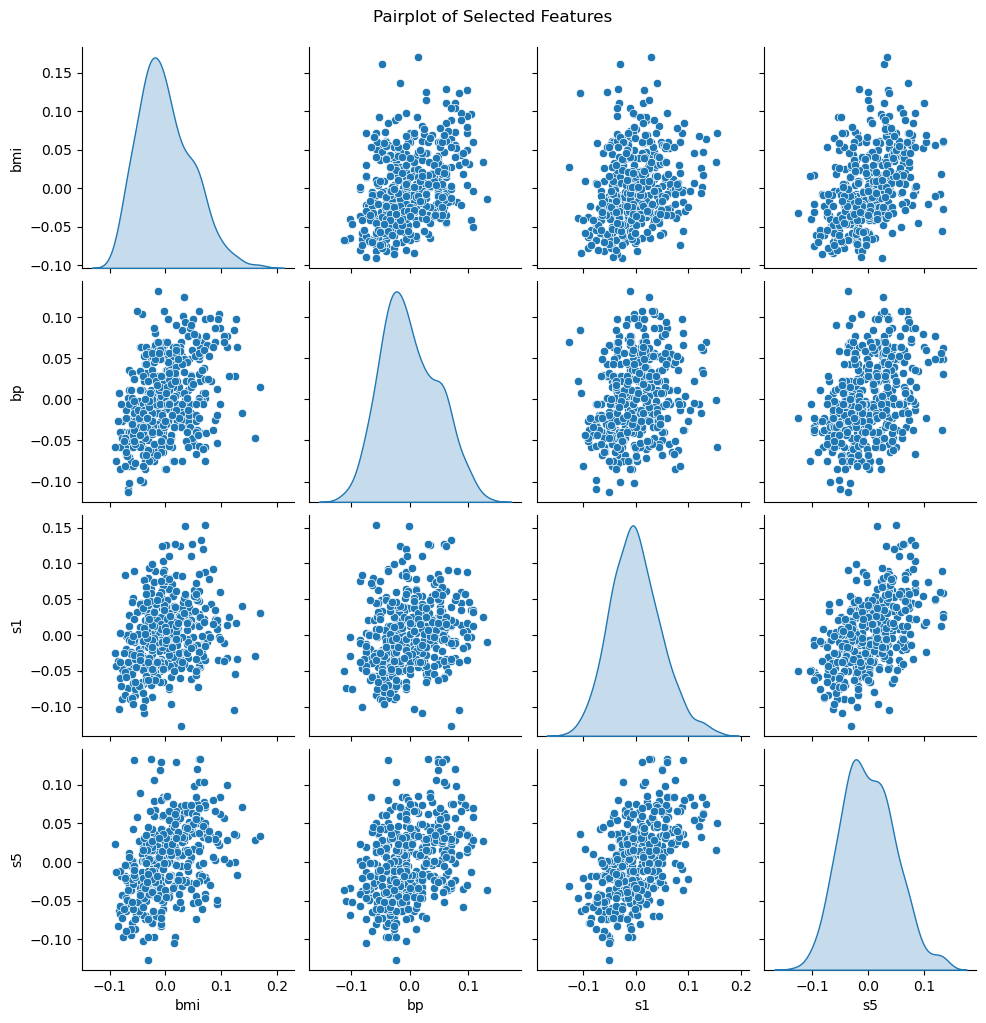

In [7]:
# Visulize the relationship 

# correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

# Pairplot subset
sns.pairplot(X[['bmi', 'bp', 's1', 's5']], diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


In [8]:
# Train-test split and scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [9]:
# Train a Linear Regression model
from sklearn.linear_model import LinearRegression
mylinear_model = LinearRegression()
mylinear_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = mylinear_model.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 2900.1936284934823
R^2 Score: 0.45260276297191926


### Polynomial Regression Model

Mean Squared Error (Polynomial): 140561.0700081099
R^2 Score (Polynomial): -25.530208397195263


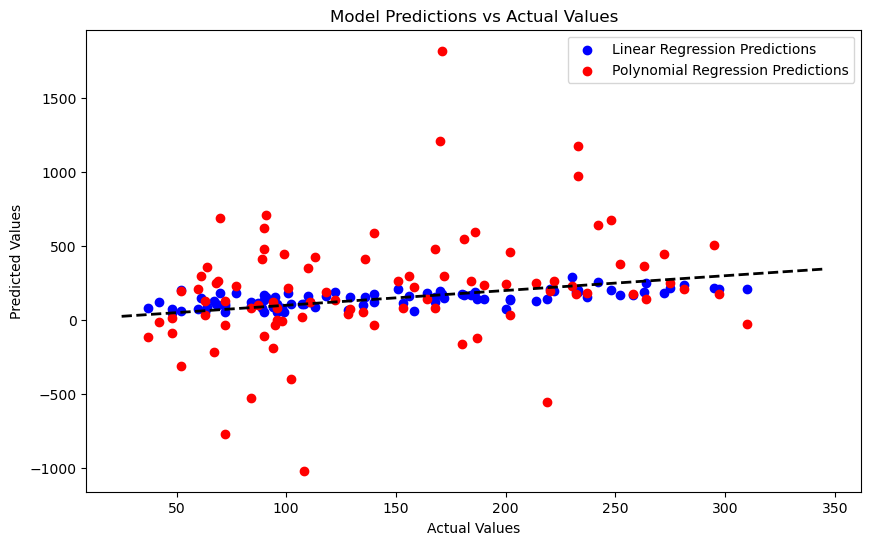

In [10]:
# Generate polynomial features
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train_scaled)
X_poly_test = poly_features.transform(X_test_scaled)

# Train a Polynomial Regression model
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_poly_train, y_train)

# Make predictions
y_poly_pred = polyreg.predict(X_poly_test)

# Evaluate the polynomial regression model
mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)

# Print metrics for polynomial regression
print(f'Mean Squared Error (Polynomial): {mse_poly}')
print(f'R^2 Score (Polynomial): {r2_poly}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Linear Regression Predictions')
plt.scatter(y_test, y_poly_pred, color='red', label='Polynomial Regression Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title('Model Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()
